# Appendix

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

lizard only:

| 0.616| 0.578| 0.589| 0.626| 0.573| 0.570| 0.597| 0.603| 0.617| 0.604| 0.597 |
| 0.621| 0.588| 0.604| 0.629| 0.597| 0.613| 0.598| 0.587| 0.615| 0.626| 0.608 |
| 0.603| 0.572| 0.601| 0.649| 0.593| 0.626| 0.611| 0.587| 0.634| 0.609| 0.609 |
| 0.636| 0.577| 0.596| 0.624| 0.598| 0.616| 0.625| 0.592| 0.630| 0.598| 0.609 |
| 0.607| 0.584| 0.587| 0.616| 0.571| 0.606| 0.612| 0.594| 0.604| 0.610| 0.599 |
| 0.628| 0.564| 0.606| 0.599| 0.571| 0.600| 0.594| 0.592| 0.612| 0.614| 0.598 |
| 0.619| 0.577| 0.597| 0.624| 0.584| 0.605| 0.606| 0.593| 0.619| 0.610| 0.603 |

RuboCop:
| 0.626| 0.563| 0.597| 0.625| 0.575| 0.623| 0.611| 0.596| 0.599| 0.607| 0.602 |
| 0.615| 0.557| 0.617| 0.621| 0.564| 0.607| 0.592| 0.602| 0.631| 0.614| 0.602 |
| 0.608| 0.575| 0.584| 0.622| 0.596| 0.626| 0.598| 0.602| 0.622| 0.571| 0.600 |
| 0.628| 0.562| 0.600| 0.637| 0.584| 0.617| 0.606| 0.576| 0.640| 0.585| 0.603 |
| 0.631| 0.575| 0.600| 0.616| 0.584| 0.605| 0.596| 0.616| 0.640| 0.574| 0.604 |
| 0.617| 0.568| 0.588| 0.622| 0.606| 0.629| 0.593| 0.590| 0.623| 0.586| 0.602 |
| 0.621| 0.567| 0.597| 0.624| 0.585| 0.618| 0.599| 0.597| 0.626| 0.589| 0.602 |

In [10]:
import json

fn = 'RubygemDigger--Steps--GenerateJsonForLastVersions--1.data.json'
with open(fn) as f: data = json.load(f)
simple_analysis = data["simple_analysis"]
keys = simple_analysis.keys()
d = data["data"]

df = pd.io.json.json_normalize(d)

In [5]:
def error_rate(field):
    return average_stddev_percent(field) - abs(improved_rate(field))

def improved_rate(field):
    return (field["abandoned"]["avg"] - field["maintained"]["avg"]) * 100 / field["maintained"]["avg"]
def stddev_percent(data):
    return data["stddev"] * 100 / data["avg"]
def average_stddev_percent(field):
    return (stddev_percent(field["maintained"]) + stddev_percent(field["abandoned"])) / 2

In [6]:
def print_label(name, f):
    print("   %s:\tavg: %6.3f\tstddev: %6.3f\tstddev percent:%6.1f%%" %(name, f[name]["avg"], f[name]["stddev"], stddev_percent(f[name])))
    
impacts = {k: error_rate(simple_analysis[k]) for k in keys}
for key in (sorted(impacts.items(), key=lambda x: x[1]))[:10]:
    k = key[0]
    f = simple_analysis[k]
    print("Metrics: %s\tImprovement:%6.1f%%\tError rate:%6.1f%%" % (key[0],improved_rate(f), key[1]))
    for name in ('maintained', 'abandoned', 'with_issues'):
        print_label(name, f)



Metrics: style_	Improvement:  24.8%	Error rate:  26.0%
   maintained:	avg: 48.401	stddev: 26.349	stddev percent:  54.4%
   abandoned:	avg: 60.395	stddev: 28.462	stddev percent:  47.1%
   with_issues:	avg: 56.487	stddev: 30.394	stddev percent:  53.8%
Metrics: avg_ccn	Improvement:   3.2%	Error rate:  29.2%
   maintained:	avg:  1.757	stddev:  0.581	stddev percent:  33.1%
   abandoned:	avg:  1.813	stddev:  0.573	stddev percent:  31.6%
   with_issues:	avg:  1.762	stddev:  0.370	stddev percent:  21.0%
Metrics: lint_	Improvement:  26.6%	Error rate:  32.5%
   maintained:	avg:  6.688	stddev:  4.296	stddev percent:  64.2%
   abandoned:	avg:  8.467	stddev:  4.570	stddev percent:  54.0%
   with_issues:	avg:  6.913	stddev:  3.918	stddev percent:  56.7%
Metrics: metrics_	Improvement:  20.1%	Error rate:  38.7%
   maintained:	avg:  6.766	stddev:  4.183	stddev percent:  61.8%
   abandoned:	avg:  8.123	stddev:  4.529	stddev percent:  55.8%
   with_issues:	avg:  7.851	stddev:  5.327	stddev percent:  67.8

In [7]:
df = df[df["stat.avg_nloc"]<20]

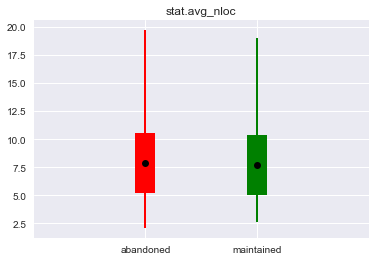

In [9]:
abdf = df[df["label"]=="abandoned"]
mtdf = df[df["label"]!="abandoned"]
x = np.random.randn(100, 2)
field = 'stat.style_'
for k in [['avg_nloc',0]]:#(sorted(impacts.items(), key=lambda x: x[1]))[:100]:
    field='stat.'+k[0]
    plt.figure(field)
    plt.title(field)
    means = np.array([abdf[field].mean(), mtdf[field].mean()])
    maxes = np.array([abdf[field].max(), mtdf[field].max()])
    mins = np.array([abdf[field].min(), mtdf[field].min()])
    std = np.array([abdf[field].std(), mtdf[field].std()])


    # create stacked errorbars:
    plt.errorbar(np.arange(2), means, std, fmt='ok', ecolor=['red', 'green'], lw=20)
    plt.errorbar(np.arange(2), means, [means - mins, maxes - means],
                 fmt='.k', ecolor=['red', 'green'], lw=2)
    plt.xticks(np.arange(2), ['abandoned', 'maintained'])
    plt.xlim(-1, 2)